In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/popular-websites-across-the-globe/Web_Scrapped_websites.csv
/kaggle/input/urldataset/data.csv
/kaggle/input/malicious-urls-dataset/malicious_phish.csv


In [15]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
from re import findall
from sklearn.model_selection import train_test_split

In [16]:
df1 = pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv')
df2 = pd.read_csv('/kaggle/input/urldataset/data.csv')
df3=pd.read_csv('/kaggle/input/popular-websites-across-the-globe/Web_Scrapped_websites.csv',encoding='latin1')

In [17]:
df1

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [18]:
df2

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [19]:
df3

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,...,Month_Average_Daily_Reach_percentage,Daily_Pageviews_percentage,Month_Average_Daily_Pageviews_percentage,Daily_Pageviews_per_user_percentage,Location,Hosted_by,Subnetworks,Registrant,Registrar,country
0,1,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9,1,37,...,1.0,-5.1,12.5,-4.1,United States,Google Inc.,216.58.203.227,NaN,NaN,Afghanistan
1,2,www.google.com,Excellent,515 007 350,Excellent,4 192 159 833,Excellent,94.2K,11.2K,11.7M,...,-1.1,1.8,-6.3,2.1,United States,Google Inc.,216.58.194.100,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
2,3,www.youtube.com,Excellent,506 457 282,Excellent,2 679 159 025,Excellent,13.5K,16.5K,19.3M,...,1.8,9.7,0.5,3.8,United States,Google Inc.,172.217.2.238,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
3,4,www.facebook.com,Excellent,270 071 255,Good,1 082 985 733,Excellent,5.87M,64.4K,127K,...,-1.5,-8.2,-2.2,-8.2,Ireland,Facebook,31.13.73.36,"Domain Administrator (Facebook, Inc.)",MARKMONITOR INC.,Afghanistan
4,5,www.yahoo.com,Excellent,99 572 035,Excellent,383 352 336,Excellent,17.2K,1.11K,798K,...,-0.8,-4.9,-0.5,-3.2,United States,Yahoo! Inc.,"98.139.180.149, 98.139.183.24",Domain Administrator (Yahoo! Inc.),MARKMONITOR INC.,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,46,www.newsdzezimbabwe.co.uk,Unknown,11 862,Unknown,51 010,Unknown,-,15,3,...,5.7,9.6,23.9,28.6,United States,Google Inc.,172.217.9.179,Name withheld. This Registrant is using a priv...,Nominet UK,Zimbabwe
9536,47,www.nehandaradio.com,Unknown,9 946,Unknown,19 894,Unknown,3,256,214,...,-19.3,66.8,-41.1,86.0,United States,"CloudFlare, Inc.","104.25.125.117, 104.25.126.117","Registration Private (Domains By Proxy, LLC)","GODADDY.COM, LLC",Zimbabwe
9537,48,www.mysagagame.com,Very poor,3 076 664,Very poor,4 091 963,Very poor,-,-,-,...,70.4,-12.4,70.1,-0.7,United States,"Webzilla, Inc.",NaN,"WHOIS AGENT (WHOIS PRIVACY PROTECTION SERVICE,...","ENOM, INC.",Zimbabwe
9538,49,www.ntd.tv,Unsatisfactory,163 932,Good,216 392,Unsatisfactory,1,-,158,...,32.6,1.0,19.2,-17.0,United States,"CloudFlare, Inc.","104.20.224.31, 104.20.225.31",Taiqi Ran (NTD),"NAME.COM, INC.",Zimbabwe


In [20]:
df1.type.unique()
df1 = df1.replace({'type':{'phishing':'bad','defacement':'bad','malware':'bad','benign':'good'}})
df1.type.unique()
df1.rename(columns={'type':'label'},inplace=True)

In [21]:
df3['Trustworthiness'].unique()
df3 = df3.replace({'Trustworthiness':{'Unsatisfactory':'bad','Poor':'bad','Very poor':'bad','Unknown':'bad','Excellent':'good',
                                     'Good':'good'}})
df3['Trustworthiness'].unique()

array(['good', 'bad'], dtype=object)

In [22]:
df3.rename(columns={'Trustworthiness':'label'},inplace=True)
df3=df3.drop(columns=['Country_Rank', 'Avg_Daily_Visitors',
       'Child_Safety', 'Avg_Daily_Pageviews', 'Privacy', 'Facebook_likes',
       'Twitter_mentions', 'Google_pluses', 'LinkedIn_mentions',
       'Pinterest_pins', 'StumbleUpon_views', 'Status', 'Traffic_Rank',
       'Reach_Day', 'Month_Average_Daily_Reach', 'Daily_Pageviews',
       'Month_Average_Daily_Pageviews', 'Daily_Pageviews_per_user',
       'Reach_Day_percentage', 'Month_Average_Daily_Reach_percentage',
       'Daily_Pageviews_percentage',
       'Month_Average_Daily_Pageviews_percentage',
       'Daily_Pageviews_per_user_percentage', 'Location', 'Hosted_by',
       'Subnetworks', 'Registrant', 'Registrar', 'country'])
df3.rename(columns={'Website':'url'},inplace=True)

In [23]:
df3

,url,label
0,www.google.com.af,good
1,www.google.com,good
2,www.youtube.com,good
3,www.facebook.com,good
4,www.yahoo.com,good
...,...,...
9535,www.newsdzezimbabwe.co.uk,bad
9536,www.nehandaradio.com,bad
9537,www.mysagagame.com,bad
9538,www.ntd.tv,bad


In [61]:
df = pd.concat([df1,df2,df3],axis=0)
df

,url,label
0,br-icloud.com.br,bad
1,mp3raid.com/music/krizz_kaliko.html,good
2,bopsecrets.org/rexroth/cr/1.htm,good
3,http://www.garage-pirenne.be/index.php?option=...,bad
4,http://adventure-nicaragua.net/index.php?optio...,bad
...,...,...
9535,www.newsdzezimbabwe.co.uk,bad
9536,www.nehandaradio.com,bad
9537,www.mysagagame.com,bad
9538,www.ntd.tv,bad


In [25]:
df.to_csv('data.csv', index=False)

In [26]:
x = df['url'][0]
x

0          br-icloud.com.br
0    diaryofagameaddict.com
0         www.google.com.af
Name: url, dtype: object

In [27]:
def getHostname(url):
    try:
        parsedUrl = urlparse(url)
        if (parsedUrl.scheme == ''):
            return str(urlparse('http://'+url).hostname)
        return str(parsedUrl.hostname)
    except:
        return url

    
def getPortN(url):
    try:
        parsedUrl = urlparse(url)
        if (parsedUrl.scheme == ''):
            port = urlparse('http://'+url).port
        else:
            port = parsedUrl.port
        if port is None:
            return 80
        else:
            return port
    except:
        return 80

def hasSuspiciousSymbol(url):
    checkSymbol = ['=','?','%','+','$','!','*',',','@'] 
    # '=','?','%' => used for GET Request. 
    # More possibility of Phishing site. 
    for symbol in checkSymbol:
        if symbol in url:
            return True
    return False
    
df['numberDots'] = [url.count('.') for url in df['url']]
df['numberHyphen'] = [url.count('-') for url in df['url']]
df['numberDigits'] = [len(findall(r'/\d/', url)) for url in df['url']]
df['urlLen'] = [len(url) for url in df['url']]
df['hostNameLen'] = [len(getHostname(url)) for url in df['url']]
df['pathLen'] = [len(str(urlparse(url).path)) for url in df['url']]
df['numberBackSlash'] = [url.count('/') for url in df['url']]
df['hasHttps'] = [1 if 'https' in url else 0 for url in df['url']]
df['portN'] = [getPortN(url) for url in df['url']]

In [28]:
df

,url,label,numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN
0,br-icloud.com.br,bad,2,1,0,16,16,16,0,0,80
1,mp3raid.com/music/krizz_kaliko.html,good,2,0,0,35,11,35,2,0,80
2,bopsecrets.org/rexroth/cr/1.htm,good,2,0,0,31,14,31,3,0,80
3,http://www.garage-pirenne.be/index.php?option=...,bad,3,1,0,88,21,10,3,0,80
4,http://adventure-nicaragua.net/index.php?optio...,bad,2,1,0,235,23,10,3,0,80
...,...,...,...,...,...,...,...,...,...,...,...
9535,www.newsdzezimbabwe.co.uk,bad,3,0,0,25,25,25,0,0,80
9536,www.nehandaradio.com,bad,2,0,0,20,20,20,0,0,80
9537,www.mysagagame.com,bad,2,0,0,18,18,18,0,0,80
9538,www.ntd.tv,bad,2,0,0,10,10,10,0,0,80


In [29]:
df = df.replace({'label':{'bad':0,'good':1}})
df

,url,label,numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN
0,br-icloud.com.br,0,2,1,0,16,16,16,0,0,80
1,mp3raid.com/music/krizz_kaliko.html,1,2,0,0,35,11,35,2,0,80
2,bopsecrets.org/rexroth/cr/1.htm,1,2,0,0,31,14,31,3,0,80
3,http://www.garage-pirenne.be/index.php?option=...,0,3,1,0,88,21,10,3,0,80
4,http://adventure-nicaragua.net/index.php?optio...,0,2,1,0,235,23,10,3,0,80
...,...,...,...,...,...,...,...,...,...,...,...
9535,www.newsdzezimbabwe.co.uk,0,3,0,0,25,25,25,0,0,80
9536,www.nehandaradio.com,0,2,0,0,20,20,20,0,0,80
9537,www.mysagagame.com,0,2,0,0,18,18,18,0,0,80
9538,www.ntd.tv,0,2,0,0,10,10,10,0,0,80


In [30]:
df = df.drop(['url'], axis=1)
X = df.drop(['label'],axis=1)
Y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1050)

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('logreg', LogisticRegression())
]

# Define meta-learner model
meta_learner = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Define stacked model  
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate stacked model
score = stacked_model.score(X_test, y_test)
print(f"Stacked model accuracy: {score}")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Stacked model accuracy: 0.920874953755087


In [34]:
predictions = stacked_model.predict(X_test)

In [37]:
X_test['predictions']=predictions
X_test['actual']=y_test

In [38]:
X_test

,numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN,predictions,actual
319657,1,3,0,62,10,62,4,0,80,1,1
327477,3,0,0,31,15,31,1,0,80,0,1
323464,2,4,0,55,13,55,2,0,80,1,1
333324,1,5,0,47,10,47,2,0,80,1,1
341605,2,4,0,51,17,51,1,0,80,1,1
...,...,...,...,...,...,...,...,...,...,...,...
610728,3,0,1,42,11,42,5,0,80,0,0
50574,2,5,0,71,35,71,1,0,80,1,1
65445,2,1,0,34,12,34,2,0,80,1,1
496852,2,9,0,176,11,10,3,0,80,0,0


In [55]:
result = X_test[(X_test['predictions'] == X_test['actual'])]

# Print the result
result.index

Int64Index([319657, 323464, 333324, 341605, 213463, 325644, 160267, 621243,
            412996, 338507,
            ...
            553149, 209885, 297069, 192367, 339233, 610728,  50574,  65445,
            496852, 288549],
           dtype='int64', length=99565)

In [64]:
X_train.shape

(973075, 9)

In [62]:
X_test.shape

(108120, 9)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     30062
           1       0.92      0.97      0.95     78058

    accuracy                           0.92    108120
   macro avg       0.92      0.88      0.90    108120
weighted avg       0.92      0.92      0.92    108120



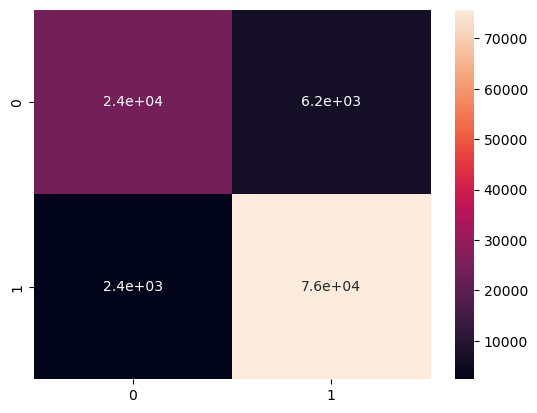

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions))

In [73]:
url="imdb.com/title/tt0030786/"
numberDots = url.count('.')
numberHyphen = url.count('-')
numberDigits = len(findall(r'/\d/', url))
urlLen = len(url)
hostNameLen = len(getHostname(url))
pathLen = len(str(urlparse(url).path))
numberBackSlash = url.count('/')
hasHttps = 1 if 'https' in url else 0
portN = getPortN(url)

temp=[numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN]
temp=pd.DataFrame(temp)
temp=temp.transpose()
temp = temp.rename(columns={0: 'numberDots', 1: 'numberHyphen',2: 'numberDigits', 
                            3: 'urlLen',4:'hostNameLen',5:'pathLen',6:'numberBackSlash',
                           7:'hasHttps',8:'portN'})
val = stacked_model.predict(temp)
val

array([1])

In [69]:
import pickle

# train and fit your classification model
model = stacked_model

# save the model to a file
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the saved model
loaded_model = pickle.load(open(filename, 'rb'))